<h2 style="text-align: center;">Generalized method of moments</h2>


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Vasicek:
    def __init__(self, kappa, theta, sigma):
        """
        Initialise les paramètres du modèle de Vasicek.
        
        :param kappa: vitesse de réversion vers la moyenne
        :param theta: niveau de la moyenne à long terme
        :param sigma: volatilité du processus
        """
        self.kappa = kappa
        self.theta = theta
        self.sigma = sigma

    def generate(self, X0, N, n):
        """
        Génère N trajectoires du processus Vasicek sur [0, 1] avec un pas de 1/n.
        
        :param X0: valeur initiale du processus
        :param N: nombre de trajectoires à générer
        :param n: nombre de pas de discrétisation (soit 1/n pour le pas de temps)
        
        :return: tableau de N trajectoires discrétisées du processus Vasicek
        """
        dt = 1 / n  # Pas de temps
        trajectories = np.zeros((N, n))  # Matrice pour stocker les trajectoires
        trajectories[:, 0] = X0  # Initialisation de toutes les trajectoires à X0

        for i in range(1, n):
            # Génération de bruit blanc standard
            Z = np.random.randn(N)  # Un bruit normal standard pour chaque trajectoire
            # Calcul de la prochaine valeur selon le modèle de Vasicek
            trajectories[:, i] = (
                trajectories[:, i - 1] * np.exp(-self.kappa * dt)
                + self.theta * (1 - np.exp(-self.kappa * dt))
                + self.sigma * np.sqrt((1 - np.exp(-2 * self.kappa * dt)) / (2 * self.kappa)) * Z
            )

        return trajectories

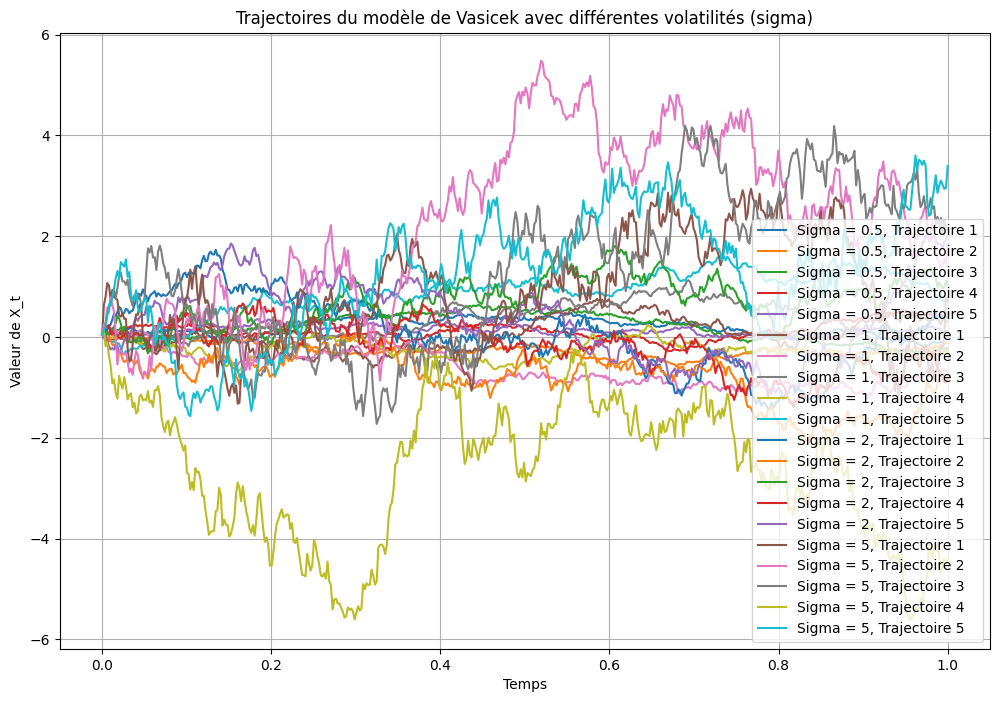

In [8]:


# Paramètres du modèle de Vasicek
kappa = 1  # vitesse de réversion vers la moyenne
theta = 0  # niveau de la moyenne à long terme
X0 = 0.05  # valeur initiale
N = 5  # nombre de trajectoires à générer
n = 500  # nombre de pas de discrétisation

# Liste des valeurs de sigma
sigma_values = [0.5, 1, 2, 5]

# Créer un objet de la classe Vasicek et générer les trajectoires pour chaque valeur de sigma
plt.figure(figsize=(12, 8))

for sigma in sigma_values:
    # Créer un objet avec la valeur de sigma courante
    vasicek_process = Vasicek(kappa, theta, sigma)
    
    # Générer les trajectoires
    trajectories = vasicek_process.generate(X0, N, n)
    
    # Affichage des trajectoires générées pour chaque sigma
    time = np.linspace(0, 1, n)
    for i in range(N):
        plt.plot(time, trajectories[i], label=f"Sigma = {sigma}, Trajectoire {i+1}")
    
plt.title("Trajectoires du modèle de Vasicek avec différentes volatilités (sigma)")
plt.xlabel("Temps")
plt.ylabel("Valeur de X_t")
plt.legend()
plt.grid(True)
plt.show()
